In [111]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import plotly.express as px

In [112]:
cleaned_houses = pd.read_csv("../Data/riyadh_houses_cleaned.csv")
extra_features = pd.read_csv("../Data/riyadh_houses_extra_features.csv")

In [113]:
cleaned_houses.head(3)

,title,size,price,bedrooms,bathrooms
0,فيلا للبيع في شارع الناقورة ، حي نمار ، الرياض,640.0,1800000.0,4.703128,4.0
1,فيلا للبيع في حي الياسمين ، الرياض,447.0,1460000.0,4.000000,4.0
2,فيلا للبيع في شارع الفيء ، حي الربيع ، الرياض,450.0,1750000.0,4.000000,5.0


In [114]:
extra_features.head(3)

,time_duration,neighborhood
0,7 days 00:00:00,نمار
1,0 days 00:01:00,الياسمين
2,1 days 00:00:00,الربيع


In [115]:
#connect the two dataframes 'cleaned_houses' & 'extra_features'
final_houses = pd.concat([cleaned_houses, extra_features], axis=1)

In [116]:
final_houses

,title,size,price,bedrooms,bathrooms,time_duration,neighborhood
0,فيلا للبيع في شارع الناقورة ، حي نمار ، الرياض,640.000000,1.800000e+06,4.703128,4.0,7 days 00:00:00,نمار
1,فيلا للبيع في حي الياسمين ، الرياض,447.000000,1.460000e+06,4.000000,4.0,0 days 00:01:00,الياسمين
2,فيلا للبيع في شارع الفيء ، حي الربيع ، الرياض,450.000000,1.750000e+06,4.000000,5.0,1 days 00:00:00,الربيع
3,فيلا للبيع في الرياض,336.000000,1.200000e+06,4.000000,5.0,91 days 06:00:00,طويق
4,فيلا للبيع في شارع وادي الساحل ، الرياض,373.000000,1.230000e+06,4.000000,4.0,0 days 13:00:00,الرمال
...,...,...,...,...,...,...,...
9969,فيلا للبيع في حي ظهرة لبن ، الرياض,300.000000,1.300000e+06,4.703128,5.0,0 days 22:00:00,لبن
9970,فيلا للبيع في حي الياسمين ، الرياض,360.000000,2.100000e+06,5.000000,5.0,0 days 08:00:00,الياسمين
9971,فيلا للبيع في طريق الملك عبدالعزيز ، الرياض,391.000000,1.600000e+06,5.000000,3.0,30 days 10:00:00,العارض
9972,فيلا للبيع في شارع حفصة بنت عمر ، حي الروضة ، ...,475.679968,1.895103e+06,5.000000,5.0,0 days 01:00:00,الروضة


In [117]:
#get the columns names as a list
new_columns = final_houses.columns.to_list()
new_columns

['title',
 'size',
 'price',
 'bedrooms',
 'bathrooms',
 'time_duration',
 'neighborhood']

In [118]:
def swap(list_, index1, index2):
    '''
    function to swap to elements in the list.
    
    return:
    new list with new order.
    '''
    list_[index1], list_[index2] = list_[index2], list_[index1]
    return list_


# rearrange the columns order
new_columns = swap(new_columns, 2, 6)
new_columns = swap(new_columns, 2, 1)
new_columns = swap(new_columns, 2, 5)
new_columns

['title',
 'neighborhood',
 'time_duration',
 'bedrooms',
 'bathrooms',
 'size',
 'price']

In [119]:
#set the final houses with new order of columns.
final_houses = final_houses[new_columns]
final_houses

,title,neighborhood,time_duration,bedrooms,bathrooms,size,price
0,فيلا للبيع في شارع الناقورة ، حي نمار ، الرياض,نمار,7 days 00:00:00,4.703128,4.0,640.000000,1.800000e+06
1,فيلا للبيع في حي الياسمين ، الرياض,الياسمين,0 days 00:01:00,4.000000,4.0,447.000000,1.460000e+06
2,فيلا للبيع في شارع الفيء ، حي الربيع ، الرياض,الربيع,1 days 00:00:00,4.000000,5.0,450.000000,1.750000e+06
3,فيلا للبيع في الرياض,طويق,91 days 06:00:00,4.000000,5.0,336.000000,1.200000e+06
4,فيلا للبيع في شارع وادي الساحل ، الرياض,الرمال,0 days 13:00:00,4.000000,4.0,373.000000,1.230000e+06
...,...,...,...,...,...,...,...
9969,فيلا للبيع في حي ظهرة لبن ، الرياض,لبن,0 days 22:00:00,4.703128,5.0,300.000000,1.300000e+06
9970,فيلا للبيع في حي الياسمين ، الرياض,الياسمين,0 days 08:00:00,5.000000,5.0,360.000000,2.100000e+06
9971,فيلا للبيع في طريق الملك عبدالعزيز ، الرياض,العارض,30 days 10:00:00,5.000000,3.0,391.000000,1.600000e+06
9972,فيلا للبيع في شارع حفصة بنت عمر ، حي الروضة ، ...,الروضة,0 days 01:00:00,5.000000,5.0,475.679968,1.895103e+06


---
## Question 1:
in any neighborhood, the most houses are expensive and in any neighborhood the most houses are cheap?

In [120]:
def get_most_neighborhood(agg_function):
    '''
    function to get the most min/max houses 
    '''
    neighborhoods_by_mean = final_houses.groupby('neighborhood').mean()
    filter_mask = neighborhoods_by_mean['price'] == neighborhoods_by_mean['price'].agg(agg_function)
    return neighborhoods_by_mean[filter_mask]



cheapest_neighborhood = get_most_neighborhood('min')
expensive_neighborhood = get_most_neighborhood('max')

In [121]:
cheapest_neighborhood

,bedrooms,bathrooms,size,price
neighborhood,,,,
اليمامة,4.4,4.0,325.0,366000.0


In [122]:
expensive_neighborhood

,bedrooms,bathrooms,size,price
neighborhood,,,,
الفلاح,4.540626,4.8,527.2,2.679021e+06


In [123]:
final_houses['neighborhood'] = final_houses['neighborhood'].str.strip()
houses_price_by_neighborhood = final_houses.groupby('neighborhood').mean()

houses_price_by_neighborhood

,bedrooms,bathrooms,size,price
neighborhood,,,,
أحد,4.443304,4.200000,393.210284,1.004000e+06
اشبيلية,4.589286,4.400000,434.610284,1.693746e+06
الازدهار,4.901043,4.333333,475.226656,2.333333e+06
الاسكان,5.500000,3.000000,400.000000,6.250000e+05
الاندلس,4.823318,4.923077,474.978452,1.615015e+06
...,...,...,...,...
فيصل,4.675782,4.375000,514.589984,1.934069e+06
قرطبة,4.735102,4.514487,404.815345,1.918087e+06
لبن,4.760279,4.476768,344.137489,1.204720e+06


In [124]:
def get_riyadh_map():
    ksa_map = gpd.read_file("../Data/districts.geojson")
    riyadh_mask = ksa_map['city_id'] == 3
    return ksa_map[riyadh_mask]


riyadh_map = get_riyadh_map()
riyadh_map

,district_id,city_id,region_id,name_ar,name_en,geometry
0,10100003001,3,1,حي العمل,Al Amal Dist.,"POLYGON ((46.72488 24.64900, 46.71615 24.65122..."
1,10100003002,3,1,حي النموذجية,Al Namudhajiyah Dist.,"POLYGON ((46.70228 24.65018, 46.70169 24.65439..."
2,10100003003,3,1,حي الجرادية,Al Jarradiyah Dist.,"POLYGON ((46.70655 24.61729, 46.70110 24.61799..."
3,10100003004,3,1,حي الصناعية,Al Sinaiyah Dist.,"POLYGON ((46.76000 24.64062, 46.75861 24.64535..."
4,10100003005,3,1,حي منفوحة الجديدة,Manfuha Al Jadidah Dist.,"POLYGON ((46.72719 24.61343, 46.72651 24.61507..."
...,...,...,...,...,...,...
182,10100003191,3,1,حي العلا,Al Ula Dist.,"POLYGON ((47.18165 25.03434, 47.18148 25.05351..."
183,10100003192,3,1,حي المشرق,Al Mashriq Dist.,"POLYGON ((47.08598 25.00546, 47.08078 25.00664..."
184,10100003193,3,1,حي النخبة,Al Nakhbah Dist.,"POLYGON ((47.31180 25.01215, 47.31231 25.01480..."
185,10100003194,3,1,حي السحاب,Al Sahab Dist.,"POLYGON ((47.01278 24.96323, 47.01098 24.96408..."


In [125]:
#remove "حي" word and then strip the whitespaces.
neighbors = riyadh_map['name_ar'].str.replace("حي", "")
neighbors = neighbors.str.strip()

#reassign the new neighborhoods, and rename the column to "neighborhood"
riyadh_map['name_ar'] = neighbors
riyadh_map = riyadh_map.rename(columns={'name_ar': 'neighborhood'})

riyadh_map

,district_id,city_id,region_id,neighborhood,name_en,geometry
0,10100003001,3,1,العمل,Al Amal Dist.,"POLYGON ((46.72488 24.64900, 46.71615 24.65122..."
1,10100003002,3,1,النموذجية,Al Namudhajiyah Dist.,"POLYGON ((46.70228 24.65018, 46.70169 24.65439..."
2,10100003003,3,1,الجرادية,Al Jarradiyah Dist.,"POLYGON ((46.70655 24.61729, 46.70110 24.61799..."
3,10100003004,3,1,الصناعية,Al Sinaiyah Dist.,"POLYGON ((46.76000 24.64062, 46.75861 24.64535..."
4,10100003005,3,1,منفوحة الجديدة,Manfuha Al Jadidah Dist.,"POLYGON ((46.72719 24.61343, 46.72651 24.61507..."
...,...,...,...,...,...,...
182,10100003191,3,1,العلا,Al Ula Dist.,"POLYGON ((47.18165 25.03434, 47.18148 25.05351..."
183,10100003192,3,1,المشرق,Al Mashriq Dist.,"POLYGON ((47.08598 25.00546, 47.08078 25.00664..."
184,10100003193,3,1,النخبة,Al Nakhbah Dist.,"POLYGON ((47.31180 25.01215, 47.31231 25.01480..."
185,10100003194,3,1,السحاب,Al Sahab Dist.,"POLYGON ((47.01278 24.96323, 47.01098 24.96408..."


In [126]:
neighborhoods_prices = riyadh_map.merge(houses_price_by_neighborhood, on="neighborhood", how="left")
prices_mean = neighborhoods_prices['price'].mean()
neighborhoods_prices['price'].fillna(prices_mean, inplace=True)
neighborhoods_prices

,district_id,city_id,region_id,neighborhood,name_en,geometry,bedrooms,bathrooms,size,price
0,10100003001,3,1,العمل,Al Amal Dist.,"POLYGON ((46.72488 24.64900, 46.71615 24.65122...",NaN,NaN,NaN,1.574298e+06
1,10100003002,3,1,النموذجية,Al Namudhajiyah Dist.,"POLYGON ((46.70228 24.65018, 46.70169 24.65439...",NaN,NaN,NaN,1.574298e+06
2,10100003003,3,1,الجرادية,Al Jarradiyah Dist.,"POLYGON ((46.70655 24.61729, 46.70110 24.61799...",5.0,5.0,628.0,7.500000e+05
3,10100003004,3,1,الصناعية,Al Sinaiyah Dist.,"POLYGON ((46.76000 24.64062, 46.75861 24.64535...",NaN,NaN,NaN,1.574298e+06
4,10100003005,3,1,منفوحة الجديدة,Manfuha Al Jadidah Dist.,"POLYGON ((46.72719 24.61343, 46.72651 24.61507...",NaN,NaN,NaN,1.574298e+06
...,...,...,...,...,...,...,...,...,...,...
182,10100003191,3,1,العلا,Al Ula Dist.,"POLYGON ((47.18165 25.03434, 47.18148 25.05351...",NaN,NaN,NaN,1.574298e+06
183,10100003192,3,1,المشرق,Al Mashriq Dist.,"POLYGON ((47.08598 25.00546, 47.08078 25.00664...",NaN,NaN,NaN,1.574298e+06
184,10100003193,3,1,النخبة,Al Nakhbah Dist.,"POLYGON ((47.31180 25.01215, 47.31231 25.01480...",NaN,NaN,NaN,1.574298e+06
185,10100003194,3,1,السحاب,Al Sahab Dist.,"POLYGON ((47.01278 24.96323, 47.01098 24.96408...",NaN,NaN,NaN,1.574298e+06


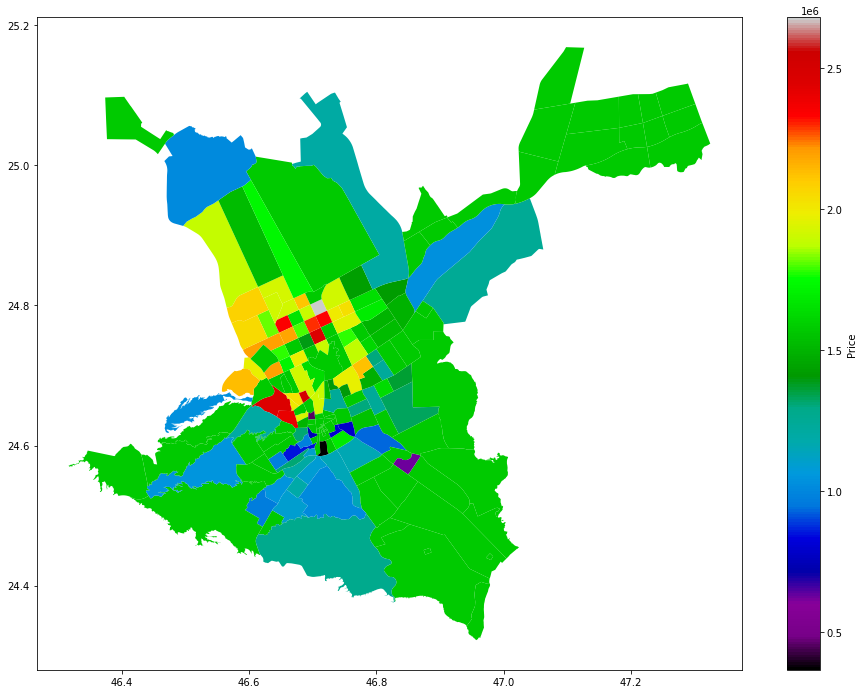

In [127]:
neighborhoods_prices.plot(column='price', figsize=(16,12),
                          legend=True, legend_kwds={'label': "Price"},
                         cmap='nipy_spectral');

## Answer 1:
cheapest neighborhood: اليمامة

the most expensive neighborhood: الفلاح

---
## Question 2:
are the bedrooms and bathrooms affect on the price?

In [128]:
final_houses.sample(10)

,title,neighborhood,time_duration,bedrooms,bathrooms,size,price
5554,فيلا للبيع في شارع رقم 384 ، الرياض,النرجس,0 days 21:00:00,4.000000,4.0,360.000000,1900000.0
2907,فيلا للبيع في حي الياسمين ، الرياض,الياسمين,7 days 00:00:00,5.000000,3.0,508.000000,2200000.0
7135,فيلا للبيع في حي الشرق ، الرياض,الشرق,6 days 00:00:00,4.703128,5.0,420.000000,1350000.0
1605,فيلا للبيع في حي الرمال ، الرياض,الرمال,21 days 00:00:00,4.000000,3.0,257.000000,1000000.0
5723,فيلا للبيع في الرياض,المهدية,2 days 00:00:00,5.000000,4.0,250.000000,970000.0
7002,فيلا للبيع في حي القيروان ، الرياض,القيروان,2 days 00:00:00,4.000000,4.0,300.000000,1800000.0
5257,فيلا للبيع في حي العوالي ، الرياض,نمار,21 days 00:00:00,4.703128,5.0,315.000000,1200000.0
2912,فيلا للبيع في شارع المبارك البغدادي ، حي الربو...,الربوة,30 days 10:00:00,5.000000,5.0,448.000000,2558000.0
5240,فيلا للبيع في طريق السيل الكبير ، الرياض,المهدية,3 days 00:00:00,4.000000,4.0,370.000000,880000.0
564,فيلا للبيع في شارع الكتاب ، حي الحزم ، الرياض,الحزم,6 days 00:00:00,6.000000,5.0,475.679968,1600000.0


<AxesSubplot:>

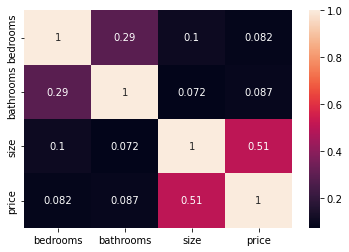

In [129]:
houses_corr = final_houses.corr()
sns.heatmap(data=houses_corr, annot=True)

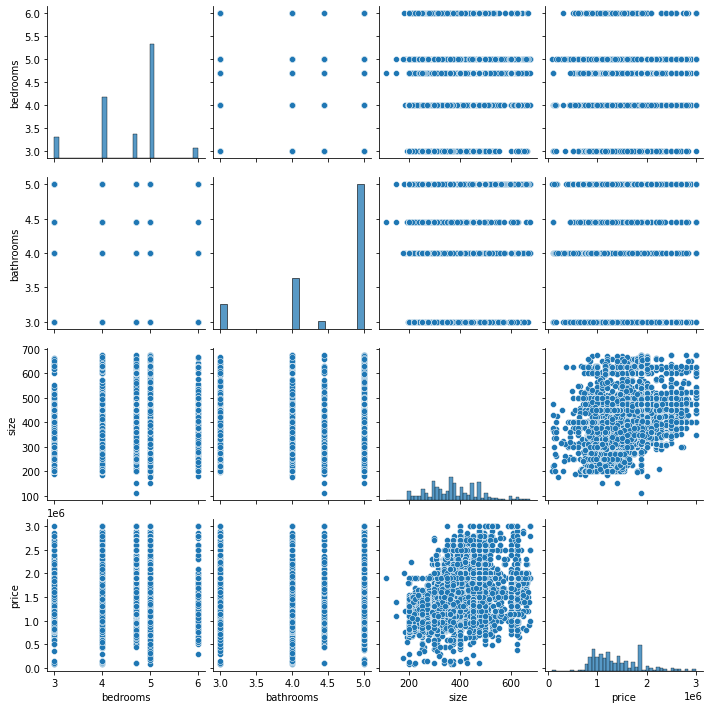

In [130]:
sns.pairplot(data=final_houses)

## Answer 2: 
No, it's not affect.

---
## Question 3:
can we predict the price of the house depending on the features we had or do we need more?

## Answer 3:
There is a small correlation between the size and the price, but it's not enough, we need more.

---
## Question 4:
in which neighborhood the most and least number of houses offers?

In [131]:
def get_most_houses_count(agg_function):
    '''
    function to get the most min/max houses 
    '''
    neighborhoods_by_counts = final_houses['neighborhood'].value_counts()
    filter_mask = neighborhoods_by_counts == neighborhoods_by_counts.agg(agg_function)
    return neighborhoods_by_counts[filter_mask]

min_neighborhood = get_most_houses_count('min')
max_neighborhood = get_most_houses_count('max')

In [132]:
min_neighborhood

سعود         1
غبيرة        1
الضباط       1
المصانع      1
الزهراء      1
الشرفية      1
والبحوث      1
الجرادية     1
الوشام       1
المؤتمرات    1
القري        1
عليشة        1
الوزارات     1
Name: neighborhood, dtype: int64

In [133]:
max_neighborhood

طويق    2106
Name: neighborhood, dtype: int64

In [134]:
neighborhood_offers = final_houses['neighborhood'].value_counts()
neighborhood_offers = pd.DataFrame(neighborhood_offers)

neighborhood_offers.rename(columns={'neighborhood': 'count'}, inplace=True)
neighborhood_offers['neighborhood'] = neighborhood_offers.index
neighborhood_offers.set_index('neighborhood', inplace=True)

neighborhood_offers

,count
neighborhood,
طويق,2106
العارض,849
الرمال,835
الملقا,628
النرجس,569
...,...
الوشام,1
المؤتمرات,1
القري,1


In [135]:
#map graph
neighborhood_offers_counts = riyadh_map.merge(neighborhood_offers, on="neighborhood", how="left")
count_mean = neighborhood_offers_counts['count'].mean()
neighborhood_offers_counts['count'].fillna(count_mean, inplace=True)
neighborhood_offers_counts

,district_id,city_id,region_id,neighborhood,name_en,geometry,count
0,10100003001,3,1,العمل,Al Amal Dist.,"POLYGON ((46.72488 24.64900, 46.71615 24.65122...",95.858586
1,10100003002,3,1,النموذجية,Al Namudhajiyah Dist.,"POLYGON ((46.70228 24.65018, 46.70169 24.65439...",95.858586
2,10100003003,3,1,الجرادية,Al Jarradiyah Dist.,"POLYGON ((46.70655 24.61729, 46.70110 24.61799...",1.000000
3,10100003004,3,1,الصناعية,Al Sinaiyah Dist.,"POLYGON ((46.76000 24.64062, 46.75861 24.64535...",95.858586
4,10100003005,3,1,منفوحة الجديدة,Manfuha Al Jadidah Dist.,"POLYGON ((46.72719 24.61343, 46.72651 24.61507...",95.858586
...,...,...,...,...,...,...,...
182,10100003191,3,1,العلا,Al Ula Dist.,"POLYGON ((47.18165 25.03434, 47.18148 25.05351...",95.858586
183,10100003192,3,1,المشرق,Al Mashriq Dist.,"POLYGON ((47.08598 25.00546, 47.08078 25.00664...",95.858586
184,10100003193,3,1,النخبة,Al Nakhbah Dist.,"POLYGON ((47.31180 25.01215, 47.31231 25.01480...",95.858586
185,10100003194,3,1,السحاب,Al Sahab Dist.,"POLYGON ((47.01278 24.96323, 47.01098 24.96408...",95.858586


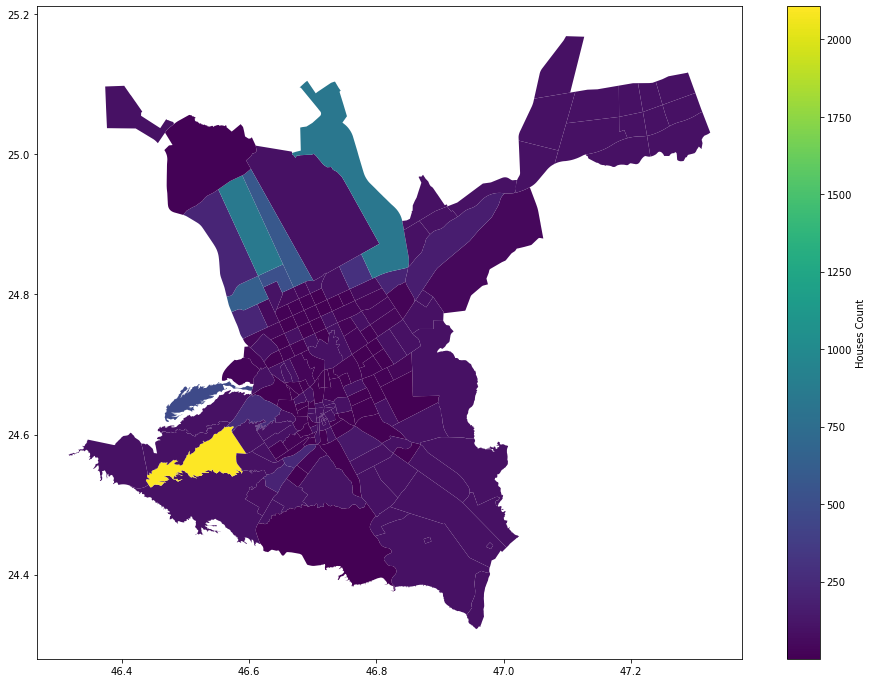

In [136]:
neighborhood_offers_counts.plot(column='count', figsize=(16,12),
                          legend=True, legend_kwds={'label': "Houses Count"});

## Answer 4:
min houses: [سعود، غبيرة، الضباط، المصانع، الزهراء، الشرفية، البحوث، الجرادية، الوشام، المؤتمرات، القري، عليشة، الوزارات]

max house: طويق

---
# Save Final Houses Dataset:

In [29]:
final_houses.to_csv('../Data/final_houses.csv', index=False)